<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/SeoulBusan_Multinomial_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Mount Drive


In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


#2.한글패치

In [ ]:

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

plt.rc('font', family='NanumBarunGothic')

In [86]:
import numpy as np

#3.Data Set

In [ ]:
file = '/gdrive/MyDrive/data/data_2020_1_12.CSV'
data = pd.read_csv(file)
data['도착영업소코드'] = data['도착영업소코드'].map({105:20, 110:77, 115:135, 120:185, 125:240, 130:215, 135:339,140:407})
data.rename(columns={'도착영업소코드' : '거리'},inplace=True)
data_destination = data[data['거리'].isin([407])]
data_time = data_destination.groupby(['집계시','요일','거리'])['통행시간'].mean()
data_distance = data_time.unstack(level=-1)
data_out = data_distance.reset_index()
stat = data_out.describe()
level25 = stat[407][4]
level75 = stat[407][6]
data_out['Grade'] = 0
def get_grade(input):
  if input > level25:
    if input > level75:
      output = 2
    else : 
      output = 1
  else:
    output = 0
  return output  

data_grade = pd.DataFrame(columns=['Time','Day','Grade'])
for index,item in data_out.iterrows():
  print(index, item['집계시'], item['요일'])
  data_grade = data_grade.append({
      'Time' : item['집계시'],
      'Day' : item['요일'],
      'Grade' : get_grade(item[407])
  }, ignore_index = True)


#4. Using Tensorflow

In [98]:
list = data_grade.values.tolist()
xtrain = [r[:2] for r in list]
ytrain = [int(r[-1]) for r in list]
y_oneshot = tf.keras.utils.to_categorical(ytrain)
learning_rate = 1e-2
iteration = 1000
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(3,input_shape = (2,),activation='softmax'))
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics = 'accuracy')
result = model.fit(np.array(xtrain), np.array(y_oneshot), epochs=iteration)

Epoch 1/1000
6/6 [==============================] - 1s 2ms/step - loss: 1.6597 - accuracy: 0.3750
Epoch 2/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4487 - accuracy: 0.3929
Epoch 3/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.2795 - accuracy: 0.4107
Epoch 4/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.2010 - accuracy: 0.3810
Epoch 5/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.0937 - accuracy: 0.3869
Epoch 6/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.0687 - accuracy: 0.4286
Epoch 7/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.0465 - accuracy: 0.4464
Epoch 8/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.0217 - accuracy: 0.4702
Epoch 9/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.0173 - accuracy: 0.4821
Epoch 10/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.0605 - accuracy: 0.4464
Epoch 11/1000
6/6 [

#5.Plotting

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


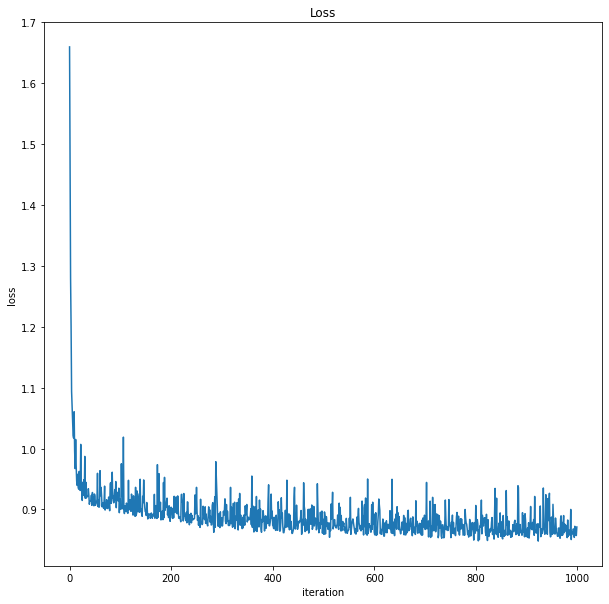

In [99]:
plt.figure(figsize=(10,10))
plt.plot(result.history['loss'])
plt.title('Loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [100]:
print("%20s %20s %20s" %('iteration', 'cost', 'accuracy'))
for step in range(iteration):
  if step%100==0:
    cost_val = result.history['loss'][step]
    acc_val = result.history['accuracy'][step]
    print("%20i %20.5f %20.5f" %(step, cost_val, acc_val))

           iteration                 cost             accuracy
                   0              1.65973              0.37500
                 100              0.91605              0.50595
                 200              0.90371              0.49405
                 300              0.88645              0.51786
                 400              0.87410              0.52976
                 500              0.88378              0.50000
                 600              0.86236              0.52381
                 700              0.86749              0.51786
                 800              0.90658              0.45238
                 900              0.86547              0.50595


In [108]:
Time = 14 #@param{type:"slider", min:0, max:23, step:1}
Day = 3 #@param{type:"slider", min:0, max:6, step:1}
time_cond = data_out['집계시'] == Time
day_cond = data_out['요일'] == Day
input = [Time, Day]
final = model.predict(np.array([input]))
grade_list = ['원활', '보통', '정체']
grade_index = np.argmax(final[0])
grade = grade_list[grade_index]
print("%15s" %('도로상황') +'\n')
print("%15s" %(grade) +'\n')
print(final[0], grade_index)

           도로상황

             보통

[0.08813831 0.56883883 0.3430228 ] 1
